In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

list_names = ['User1', 'User3','User4']#, 'User5', 'User6', 'User7']

#list_names = ['User1','User3', 'User4', 'User5', 'User6', 'User7']
nbUsers = len(list_names)

list_alpha = [0, 0.25, 0.5, 0.75, 1]#, 0.05, 0.1, 0.15, 0.2, 0.3]
nbAlpha = len(list_alpha)

list_beta = [1.05]
list_gamma = [0]

nbBetaGamma = len(list_beta)

In [2]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [3]:
globalAnalysis = pd.DataFrame()
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)




In [4]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    

In [5]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(0, 38):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [6]:
analysisPerScale.head()

Beta  Gamma  Tolerance   User      large     medium      small
Tolerance                                                                
0          1.05    0.0          0  User4  11.304844  13.794202  20.754888
300        1.05    0.0        300  User4  27.547009  46.199069  43.785240
350        1.05    0.0        350  User4  28.869333  53.419180  46.995005
400        1.05    0.0        400  User4  30.498505  57.908827  52.175425
450        1.05    0.0        450  User4  32.417768  62.492856  60.635346

In [7]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [8]:
allConfig = pd.DataFrame()

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-AllConfigTypes-'+list_names[j]+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Config'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Config'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary.index = betaGammaSummary['Tolerance']
        #betaGammaSummary['Beta'] = float(beta)
        #betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        allConfig = pd.concat([betaGammaSummary, allConfig], axis = 0, sort = True)

In [9]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0               16.312867   
1       1                  0.0               56.166850   
2       2                  0.0               63.076433   
3       3                  0.0              184.771063   
4       4                  0.0              140.814278   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0               19.807367               21.898000               30.322433   
1               56.166850               56.166850               56.166850   
2               61.270667               59.983922               59.019800   
3              197.030525              206.167138              213.313975   
4              140.795644              140.330867              138.288267   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0               33.771133               33.771133               33.771133   
1               56.166850               56.166850               56.166850   
2               72.686111               78.619044               85.324144   
3              214.708275              214.427650              214.427650   
4              137.814711              136.565689              135.540789   

   DistBoneInTolTime.1350  ...  DistanceInTolTime.700  DistanceInTolTime.750  \
0               34.656433  ...              30.786931              40.892131   
1               56.166850  ...              85.628206              89.401973   
2               95.675089  ...              37.473152              38.882541   
3              214.427650  ...              79.997062              80.463250   
4              134.584756  ...              11.861385              12.247063   

   DistanceInTolTime.800  DistanceInTolTime.850  DistanceInTolTime.900  \
0              40.892131              44.191531              44.191531   
1              94.050773              94.050773              96.424723   
2              43.551652              45.432752              45.664241   
3              80.734025             100.005450             100.005450   
4              12.278685              12.280674              12.280674   

   DistanceInTolTime.950   Obj  Scale       Task   User  
0              44.353364  obj0  small      Touch  User4  
1              96.424723  obj0  small      Raise  User4  
2              46.968775  obj0  small       Pull  User4  
3             100.005450  obj0  small       Push  User4  
4              12.280674  obj0  small  Push Down  User4  

[5 rows x 77 columns]

In [10]:
meanPerScale.tail()

Beta  Gamma      large     medium      small
450  1.05    0.0  30.108174  61.390507  50.266406
400  1.05    0.0  28.099990  55.872352  45.425155
350  1.05    0.0  26.246141  50.588596  41.028815
300  1.05    0.0  24.104736  44.100937  36.935558
0    1.05    0.0  11.291989  16.156778  12.635877

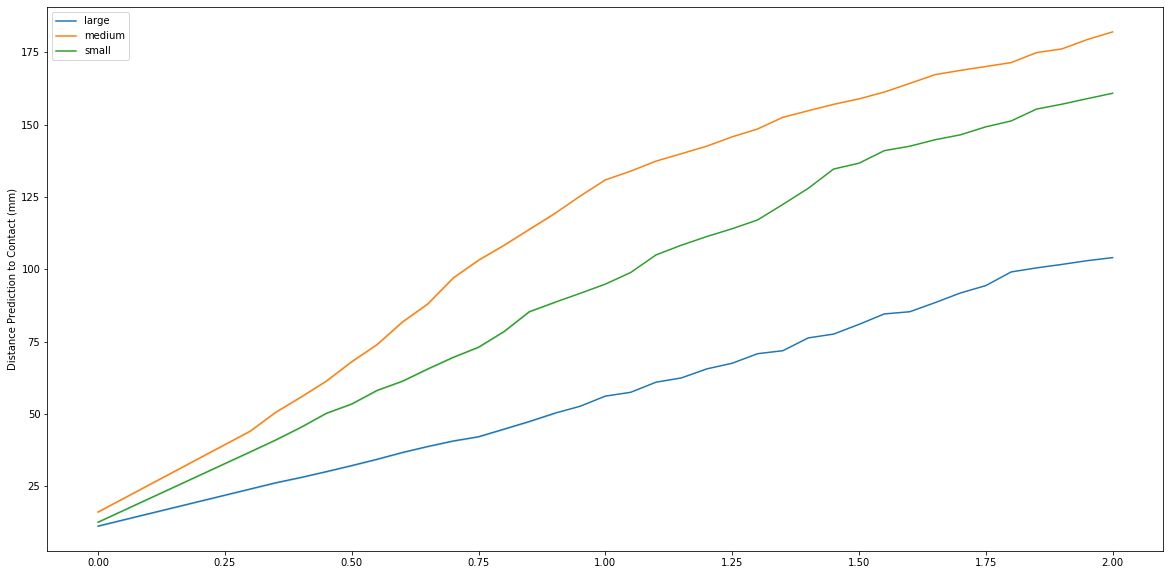

In [11]:
plt.figure(figsize = (20,10))
cond = (meanPerScale['Beta'] == 1.05) & (meanPerScale['Gamma'] == 0)
toleranceplt = meanPerScale.index/1000
sns.lineplot(x = toleranceplt , y = 'large', data = meanPerScale, label = 'large')
sns.lineplot(x = toleranceplt, y = 'medium', data = meanPerScale, label = 'medium')#[cond])
sns.lineplot(x = toleranceplt, y = 'small', data = meanPerScale, label = 'small')#[cond])
plt.ylabel('Distance Prediction to Contact (mm)')
plt.xlabel = ('Time')
plt.legend()

In [12]:
globalAnalysis

Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  \
Tolerance                                                           
0          1.05    0.000000    0.000000     0.000000     0.000000   
300        1.05   56.075306   56.075306    15.786356    15.825316   
350        1.05   56.975249   56.975249    18.394092    22.933015   
400        1.05   59.044220   59.044220    19.753042    24.691315   
450        1.05   58.574477   58.574477    21.818715    26.110770   
500        1.05   61.351286   61.351286    22.462588    31.332740   
550        1.05   66.491529   66.491529    22.732001    36.440079   
600        1.05   68.523886   68.523886    25.355488    40.650147   
650        1.05   71.926014   71.926014    25.088392    43.358468   
700        1.05   75.007300   75.007300    27.265933    50.047232   
750        1.05  107.589686  107.589686    37.390201    57.012090   
800        1.05  110.226971  110.226971    38.718583    61.458611   
850        1.05  110.573343  110.573343    38.971306    66.504219   
900        1.05  110.573343  110.573343    37.483538    73.891130   
950        1.05  110.573343  110.573343    39.510301    84.925338   
1000       1.05  106.650600  106.650600    40.542224    91.262255   
1050       1.05  105.344629  105.344629    44.662347    95.954712   
1100       1.05  104.121914  104.121914    46.459097   105.187081   
1150       1.05  105.796129  105.796129    54.033880   107.069327   
1200       1.05  105.796129  105.796129    54.957834   113.031005   
1250       1.05  105.796129  105.796129    59.872598   119.863922   
1300       1.05  105.796129  105.796129    61.284730   123.623577   
1350       1.05  105.124743  105.124743    62.037843   123.115799   
1400       1.05  107.310700  107.310700    62.620620   124.431349   
1450       1.05  107.284043  107.284043    66.303843   127.130271   
1500       1.05  133.337157  133.337157    69.801320   131.663073   
1550       1.05  133.337157  133.337157    69.726080   133.400962   
1600       1.05  133.337157  133.337157    71.244030   133.118992   
1650       1.05  133.359871  133.359871    75.640489   134.020019   
1700       1.05  133.444871  133.444871    78.228570   134.848797   
...         ...         ...         ...          ...          ...   
550        1.05   56.718431   56.718431    65.466664    73.410467   
600        1.05   63.569994   63.569994    68.479326    78.220750   
650        1.05   67.727181   67.727181    71.683833    82.583236   
700        1.05   75.444819   75.444819    76.263970    91.425813   
750        1.05   71.629137   71.629137    80.820191    98.644700   
800        1.05   82.481613   82.481613    84.882043   100.832518   
850        1.05   85.276500   85.276500    90.796922   106.607142   
900        1.05   95.163231   95.163231    93.538781   112.572313   
950        1.05  100.560050  100.560050    94.088895   124.989598   
1000       1.05  108.289594  108.289594   112.710547   136.308125   
1050       1.05  111.176637  111.176637   105.694860   137.705526   
1100       1.05  127.053509  127.053509   109.108824   152.086532   
1150       1.05  145.965378  145.965378   110.460897   155.645160   
1200       1.05  151.591246  151.591246   111.726146   164.108546   
1250       1.05  318.707540  318.707540   111.093833   171.453731   
1300       1.05  324.079640  324.079640   125.523843   170.644618   
1350       1.05  161.008186  161.008186   158.766360   186.740562   
1400       1.05  157.813979  157.813979   158.804663   189.505923   
1450       1.05  158.150675  158.150675   132.873712   188.530283   
1500       1.05  160.036388  160.036388   135.383287   189.365544   
1550       1.05  160.280869  160.280869   144.299968   191.646307   
1600       1.05  162.517556  162.517556   143.195800   192.507443   
1650       1.05  162.679531  162.679531   152.371932   192.495470   
1700       1.05  164.050700  164.050700   157.373826   205.370699   
1750       1.05  164.431231  164.431231   156.184716   200.787153   
1800     

In [13]:
analysisPerTask.head()

Beta  Gamma       Pull       Push  Push Down      Raise  Tolerance  \
Tolerance                                                                       
0          1.05    0.0  10.575376  29.816046  14.418959  15.397643          0   
300        1.05    0.0  38.842331  51.670084  35.214447  46.084380        300   
350        1.05    0.0  42.979495  56.402517  38.150883  50.856809        350   
400        1.05    0.0  48.662733  59.775289  41.167614  54.199098        400   
450        1.05    0.0  52.614840  69.995332  42.847518  60.072821        450   

               Touch   User  
Tolerance                    
0           6.215200  User4  
300        24.074289  User4  
350        27.082827  User4  
400        30.499860  User4  
450        33.712771  User4

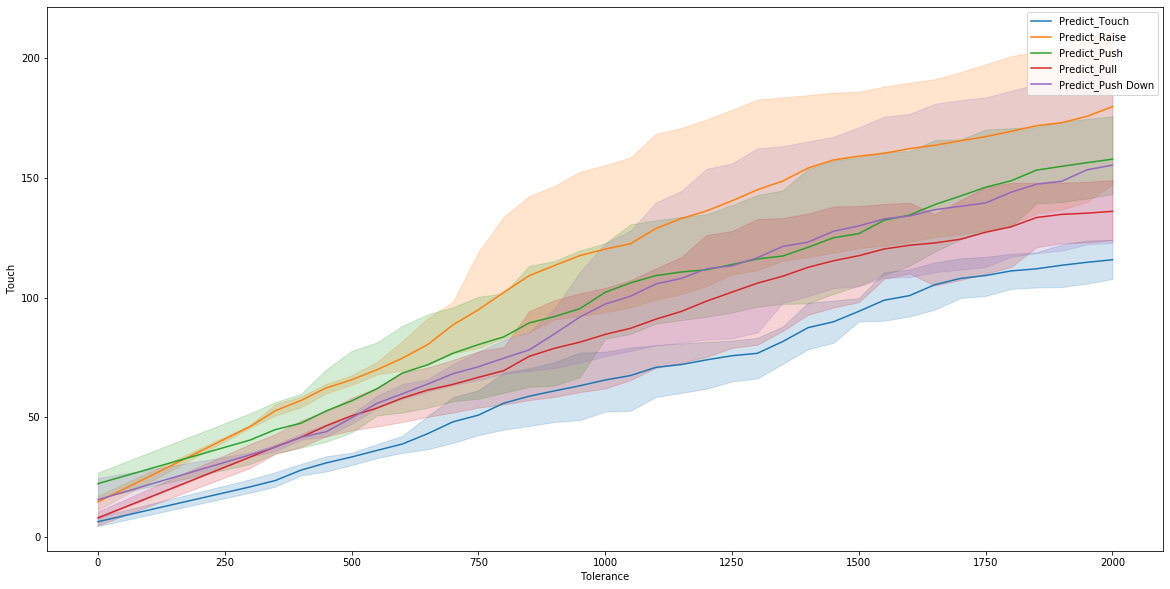

In [14]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

#plt.figure(figsize=(20,10))
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')


In [15]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0               16.312867   
1       1                  0.0               56.166850   
2       2                  0.0               63.076433   
3       3                  0.0              184.771063   
4       4                  0.0              140.814278   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0               19.807367               21.898000               30.322433   
1               56.166850               56.166850               56.166850   
2               61.270667               59.983922               59.019800   
3              197.030525              206.167138              213.313975   
4              140.795644              140.330867              138.288267   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0               33.771133               33.771133               33.771133   
1               56.166850               56.166850               56.166850   
2               72.686111               78.619044               85.324144   
3              214.708275              214.427650              214.427650   
4              137.814711              136.565689              135.540789   

   DistBoneInTolTime.1350  ...  DistanceInTolTime.700  DistanceInTolTime.750  \
0               34.656433  ...              30.786931              40.892131   
1               56.166850  ...              85.628206              89.401973   
2               95.675089  ...              37.473152              38.882541   
3              214.427650  ...              79.997062              80.463250   
4              134.584756  ...              11.861385              12.247063   

   DistanceInTolTime.800  DistanceInTolTime.850  DistanceInTolTime.900  \
0              40.892131              44.191531              44.191531   
1              94.050773              94.050773              96.424723   
2              43.551652              45.432752              45.664241   
3              80.734025             100.005450             100.005450   
4              12.278685              12.280674              12.280674   

   DistanceInTolTime.950   Obj  Scale       Task   User  
0              44.353364  obj0  small      Touch  User4  
1              96.424723  obj0  small      Raise  User4  
2              46.968775  obj0  small       Pull  User4  
3             100.005450  obj0  small       Push  User4  
4              12.280674  obj0  small  Push Down  User4  

[5 rows x 77 columns]

In [16]:
allConfig['DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig.loc[allConfig['DistanceInTolTime.0'] <= 0, 'DistInTolTime.0'] = 0
#allConfig.loc[allConfig['DistanceInTolTime.0'] > 0, 'DistInTolTime.0'] = allConfig['DistanceInTolTime.0']

for tol in range(300, 2050, 50):
    allConfig['DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] <= 0, 'DistInTolTime.'+str(tol)] = 0
    #allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] > 0, 'DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    

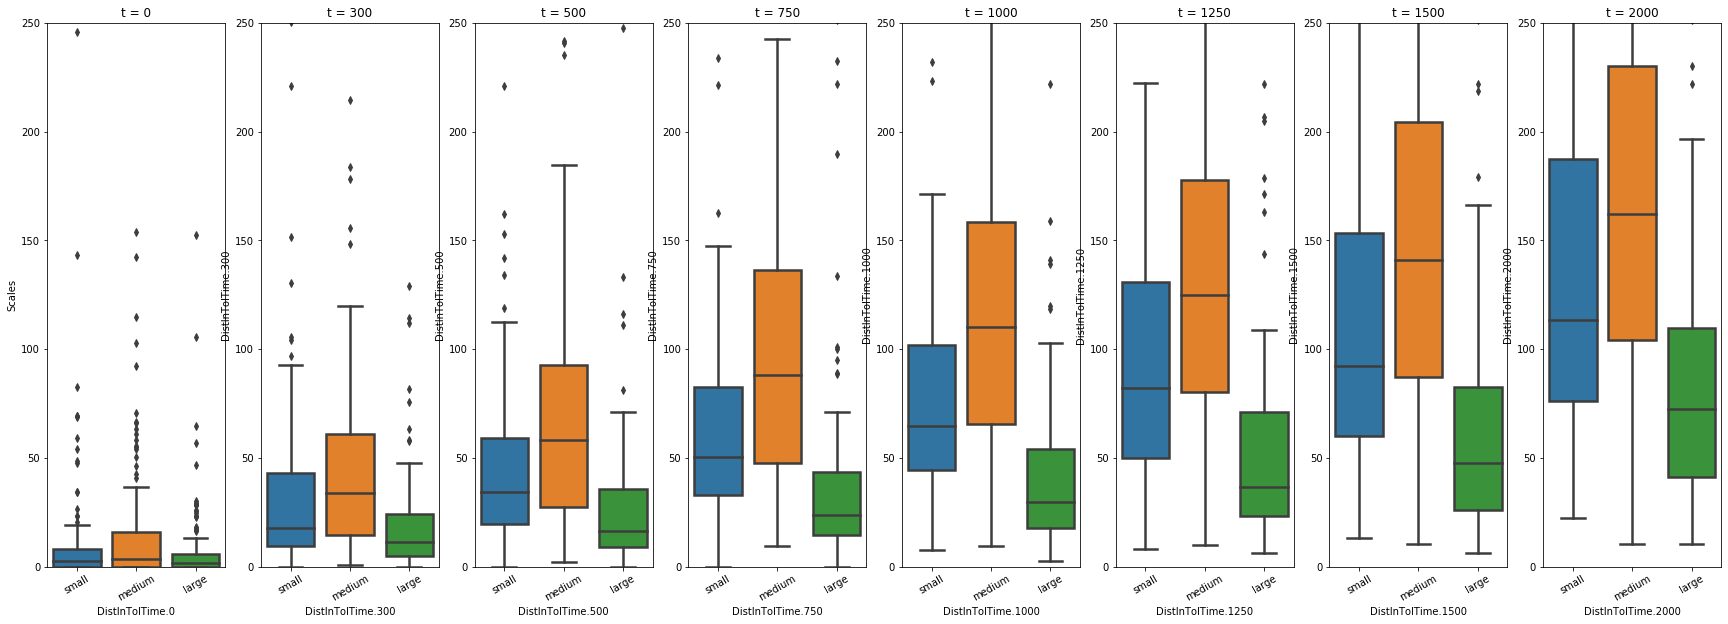

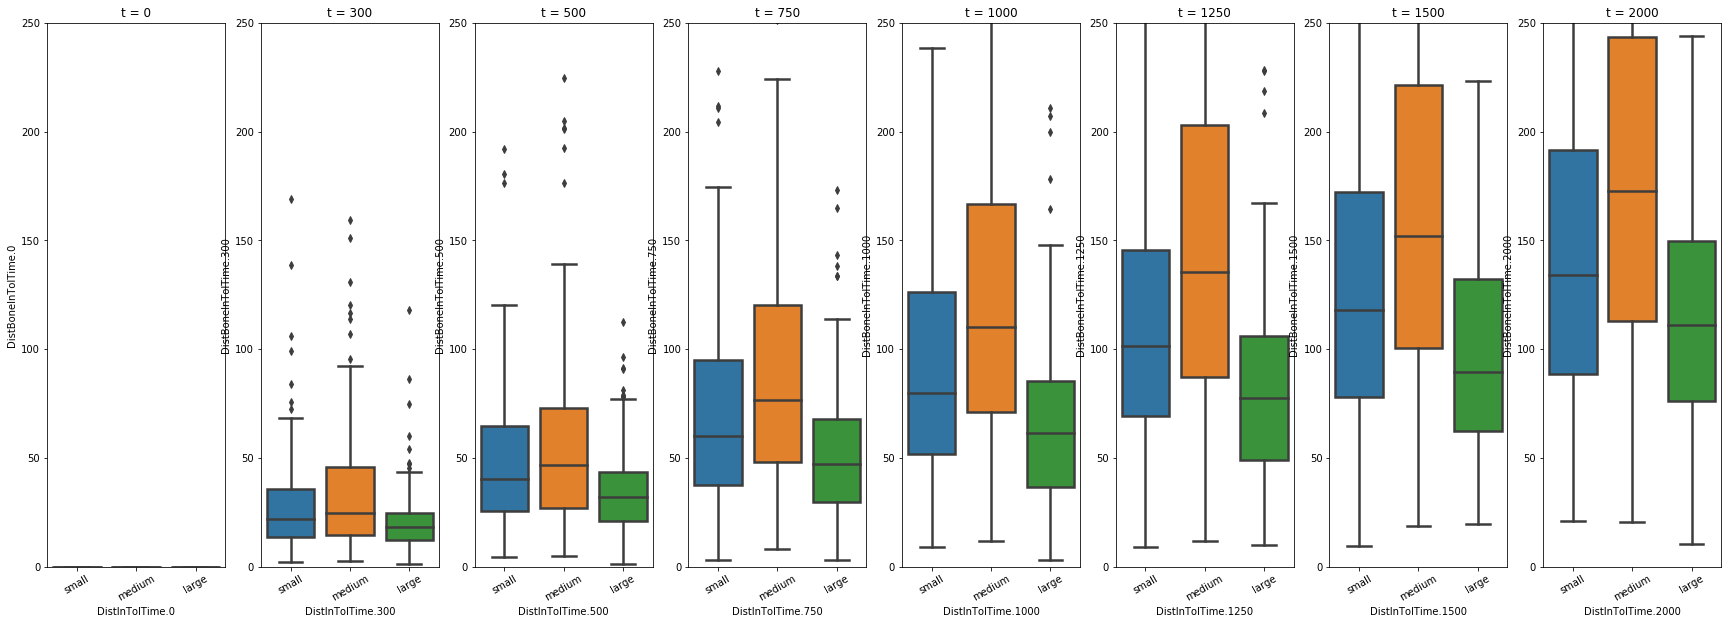

In [17]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    #nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)

    
    

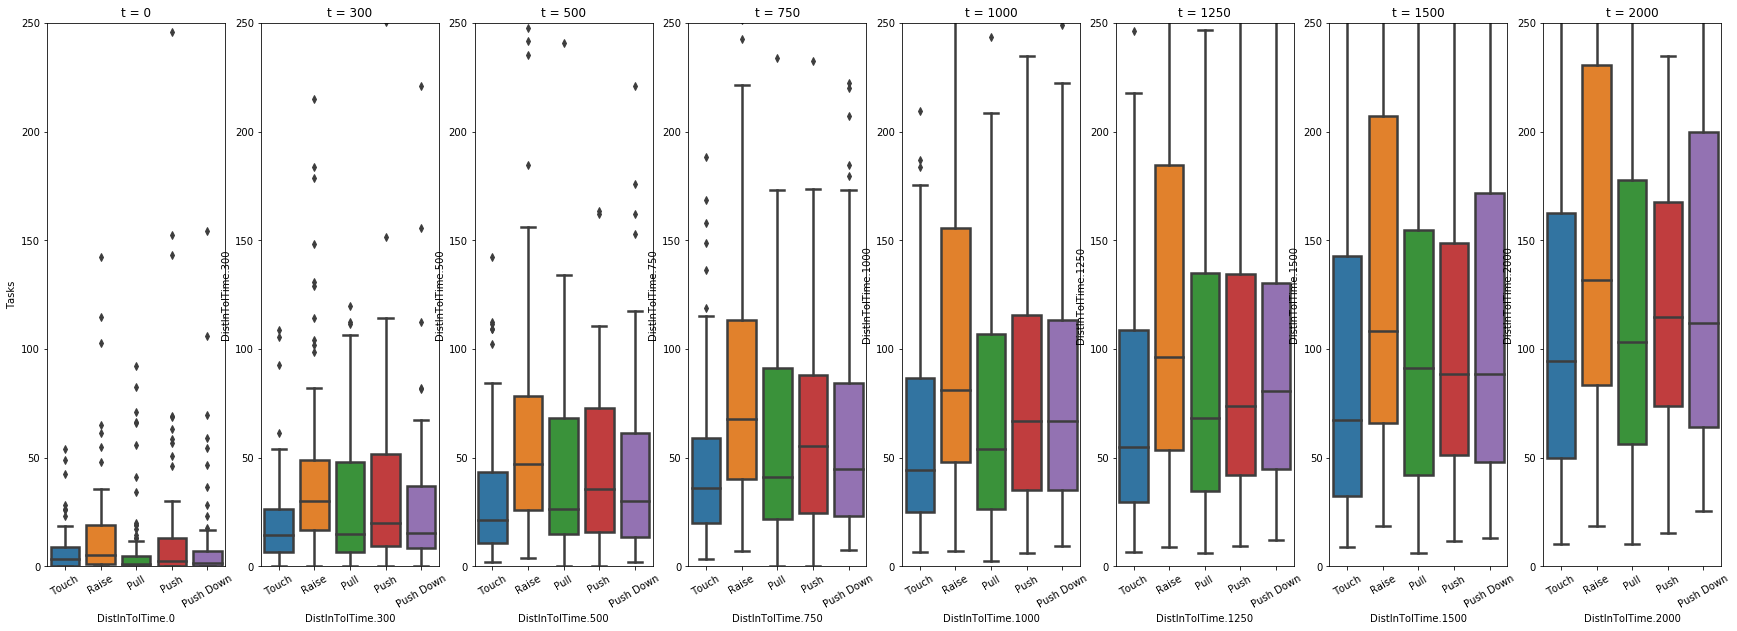

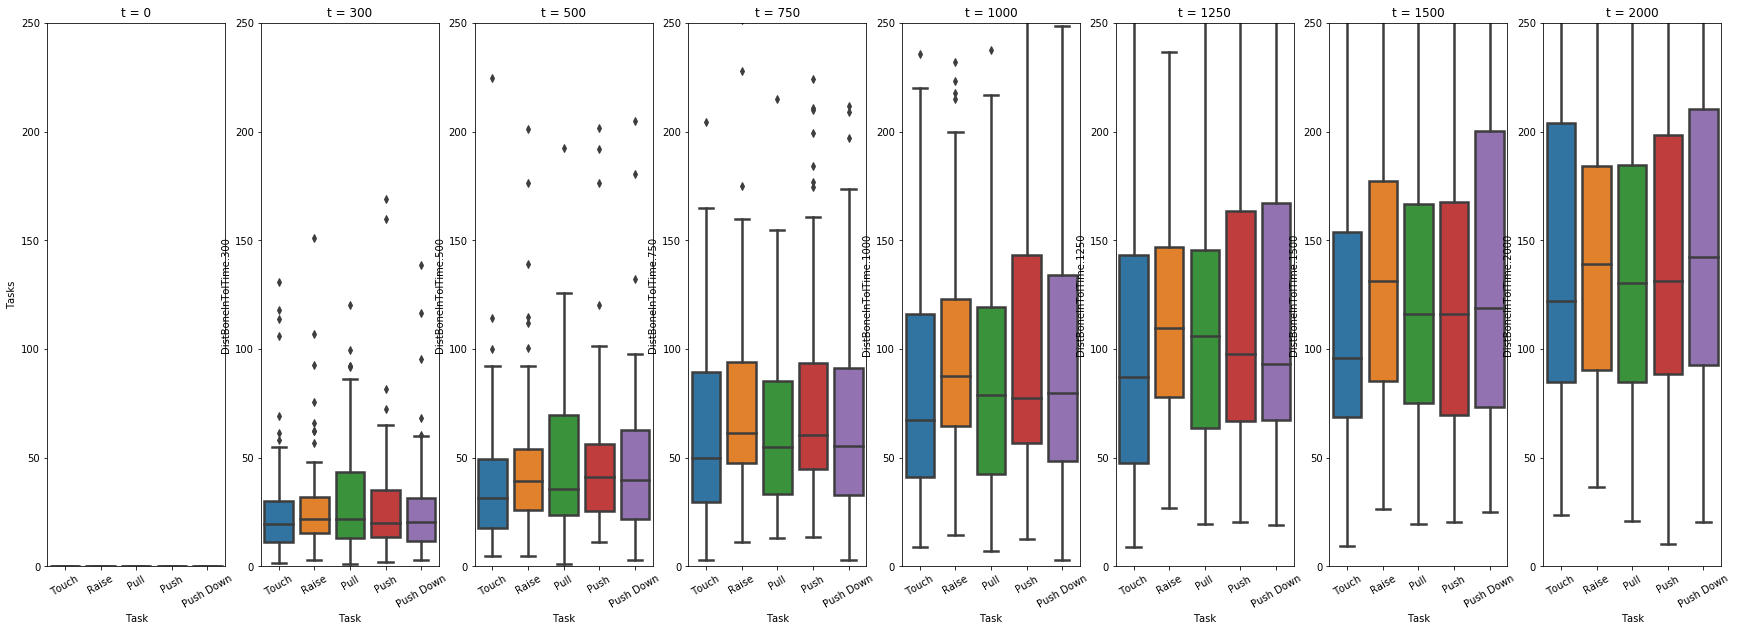

In [18]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)

    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


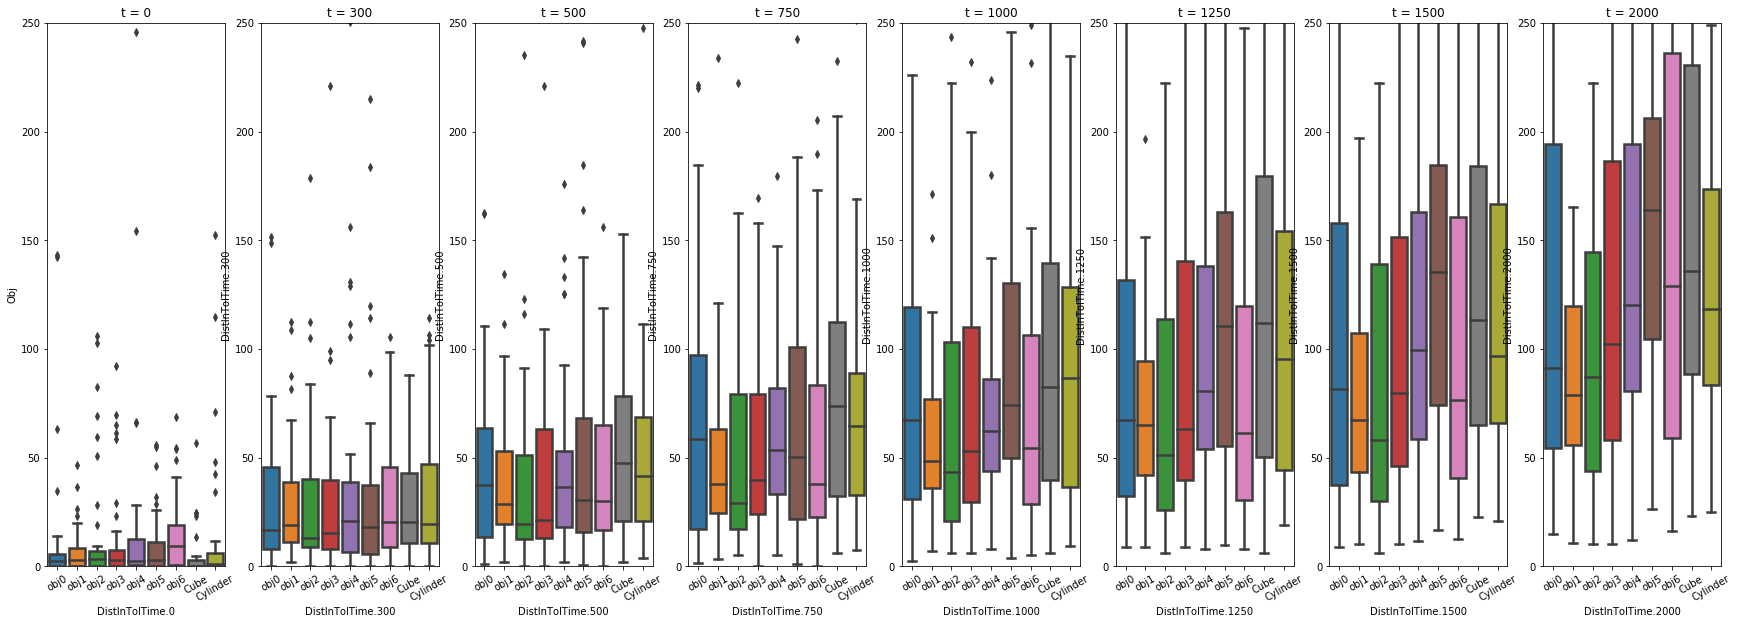

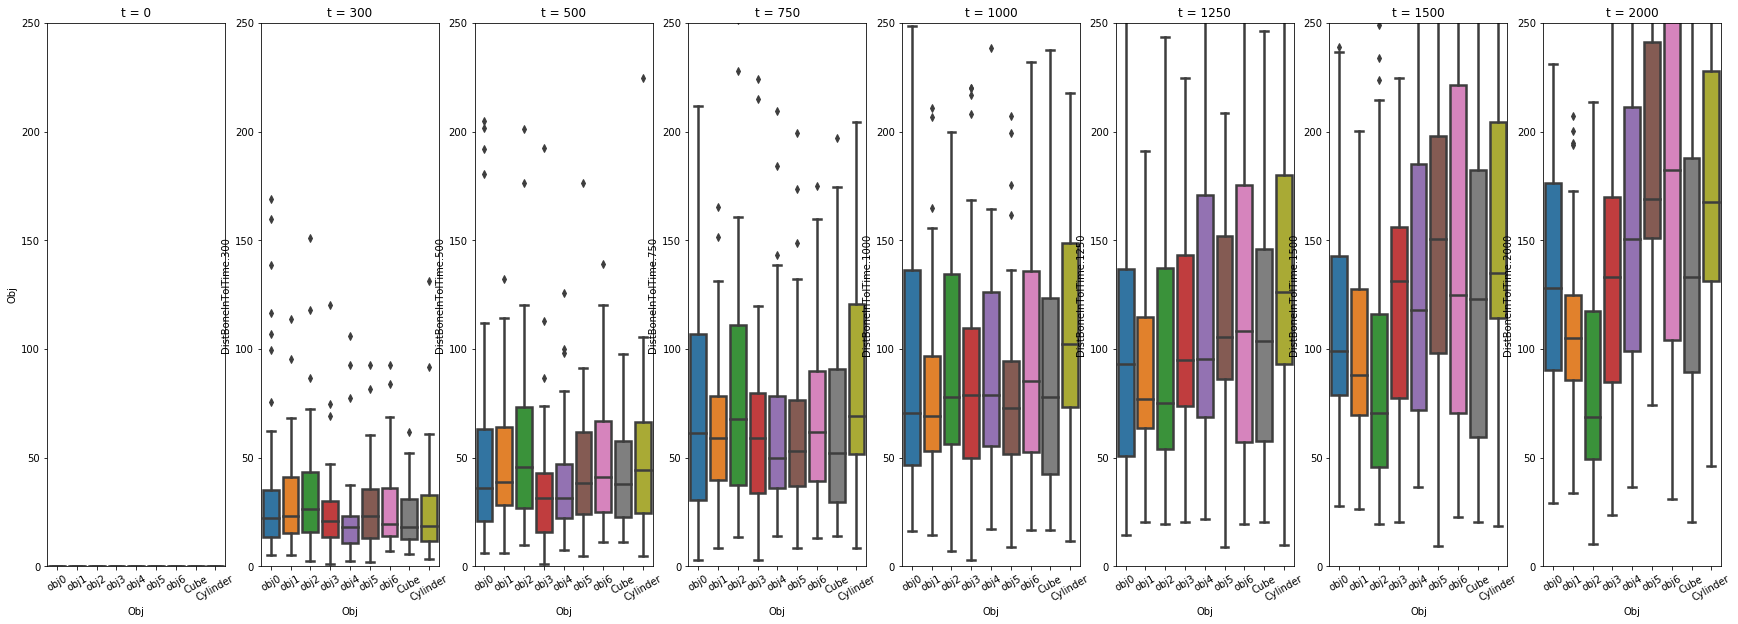

In [28]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [20]:
taskScale = pd.DataFrame()

tol = 300
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        scaleObj.loc[scales[size], objects[obj]] = mean/nbUsers        

In [21]:
taskObj

Touch      Raise       Pull       Push   Push Down
obj0      14.579219  38.085945  14.957506  50.471324   34.284821
obj1      25.082077  28.460501  41.934834  21.749373   29.774249
obj2      16.768516  41.325015  49.716067  65.857110   28.877157
obj3      20.467865  28.583653  24.583502  27.877960  101.048525
obj4      12.437315  50.380145  35.573155  46.928744   36.958487
obj5      18.794645  66.901295  40.451271  33.084363   14.898805
obj6      29.842942  50.767325  34.098753  31.089934   14.416080
Cube      20.674034  62.331248  23.740594  25.014284   35.854240
Cylinder  29.875708  48.825064  37.603058  63.302633   13.131729

In [22]:
taskScale

Touch      Raise       Pull       Push  Push Down
small   22.236589  45.836096  35.354853  50.304306  31.457843
medium  28.323601  62.354958  55.645259  43.128765  31.052099
large   12.280584  30.362344   9.886134  28.358837  40.571422

In [23]:
scaleObj

obj0       obj1       obj2       obj3       obj4       obj5  \
small   35.079045  30.759463  67.065675  25.945537  39.146322  17.083446   
medium  43.891281  39.029170  38.423731  42.202652  42.157628  72.688588   
large   12.456963  18.411988  16.036913  53.388715  28.062757  14.706193   

             obj6       Cube   Cylinder  
small   38.280659  50.871529  29.109761  
medium  40.012877  35.810596  42.691907  
large   17.835485  13.886516  43.841247

# Scales and Tasks

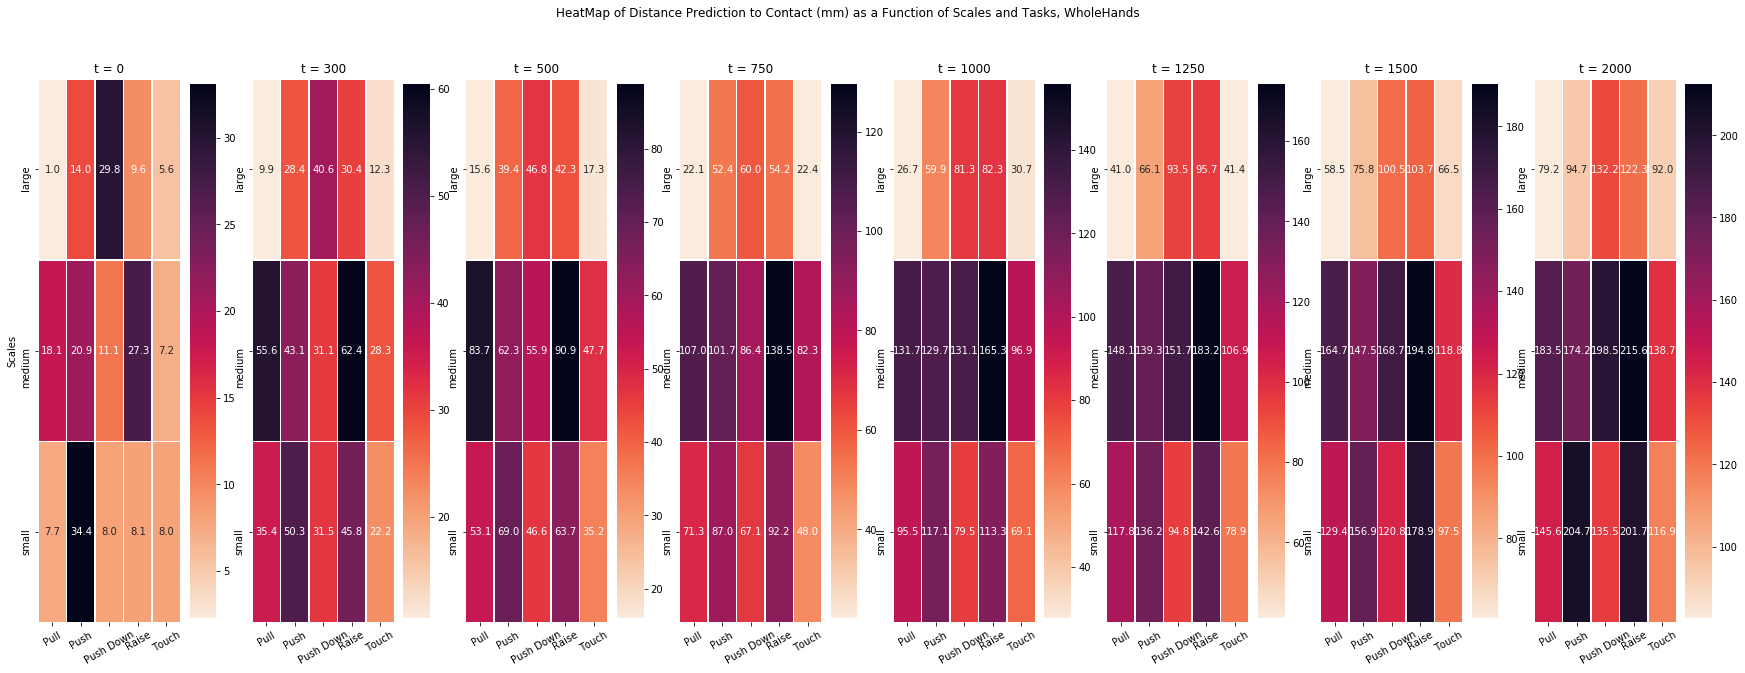

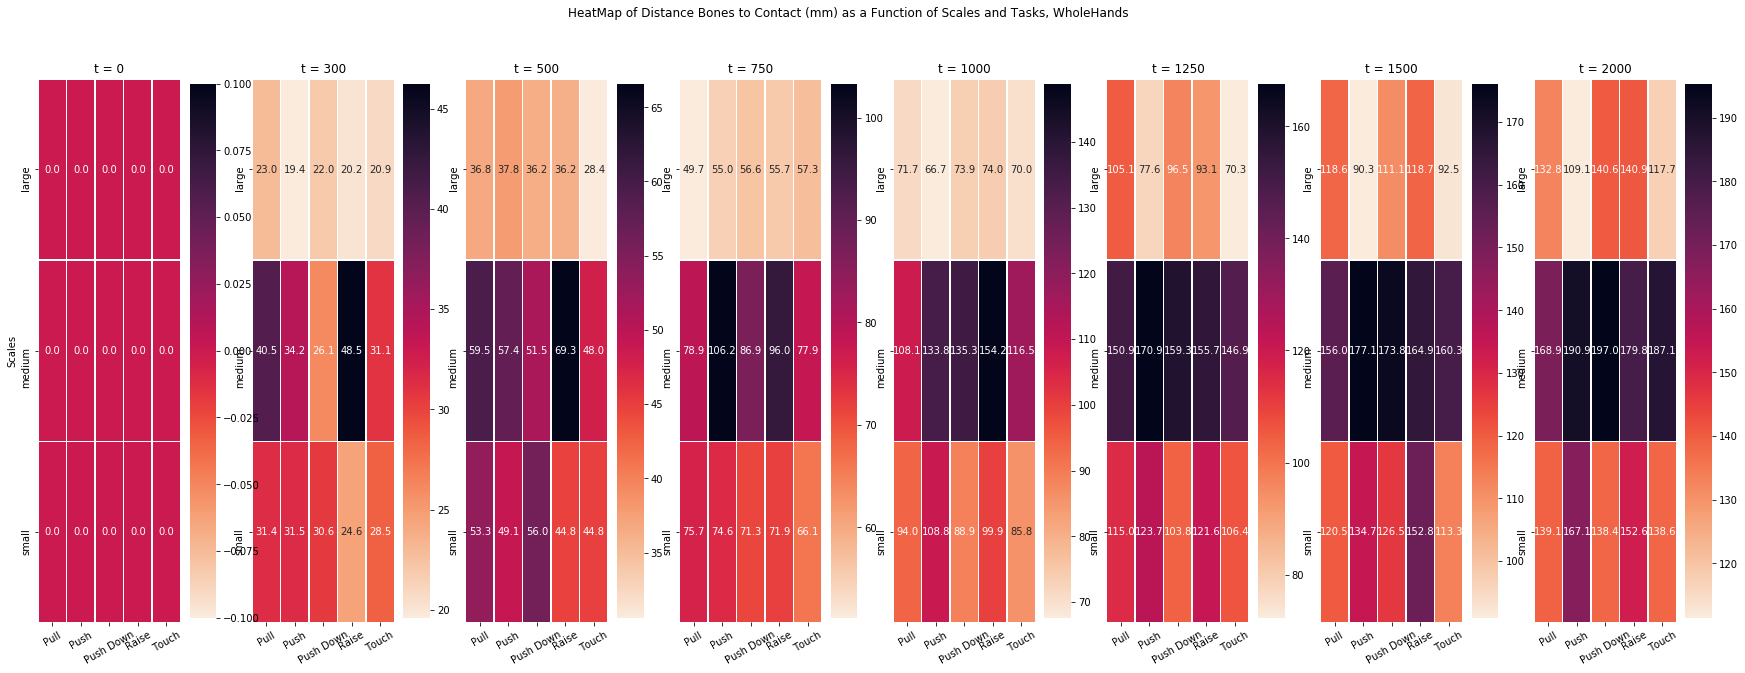

In [24]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, WholeHands')

plt.show()

In [25]:

tol = 300
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == 'obj6') & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)]
            

# Scales and Objects

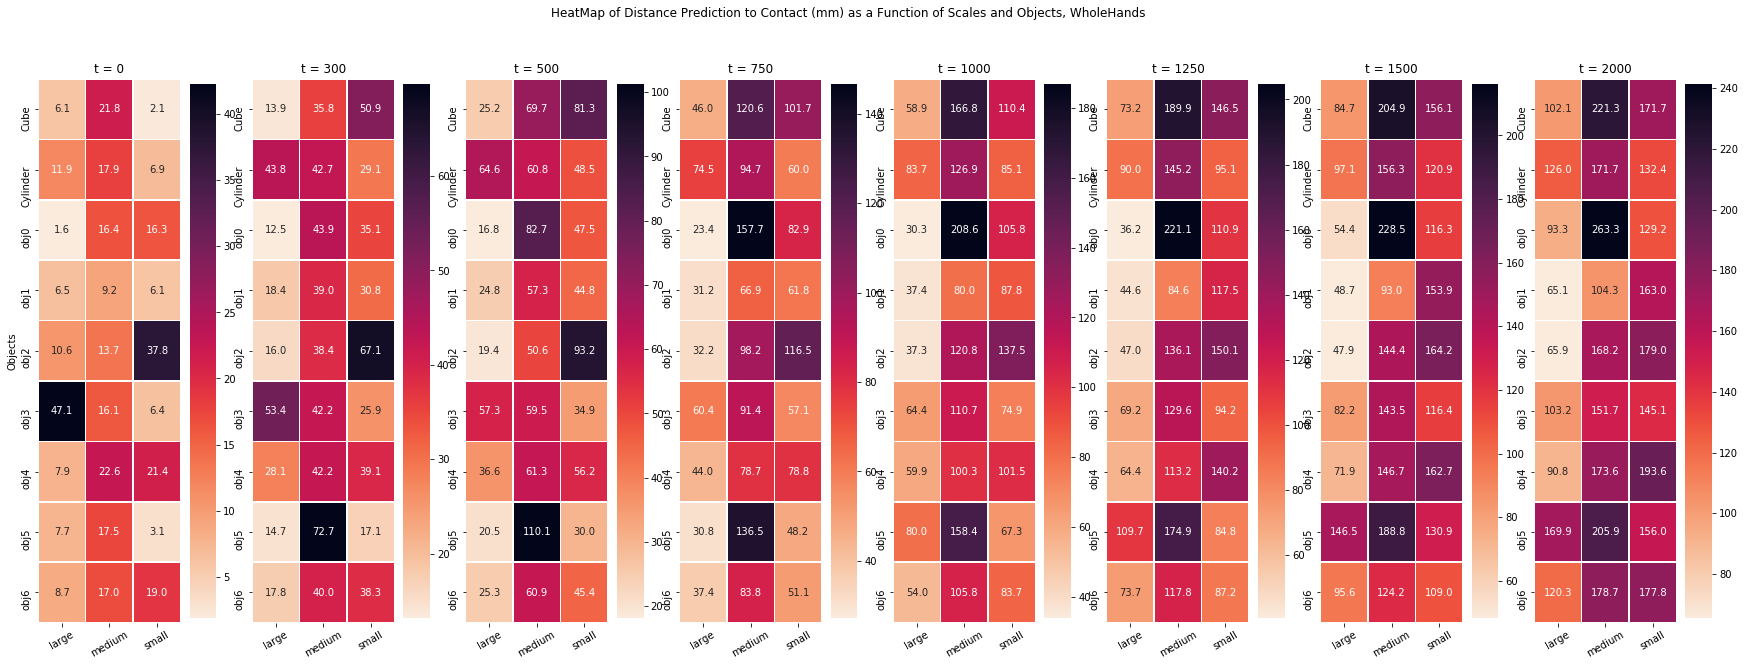

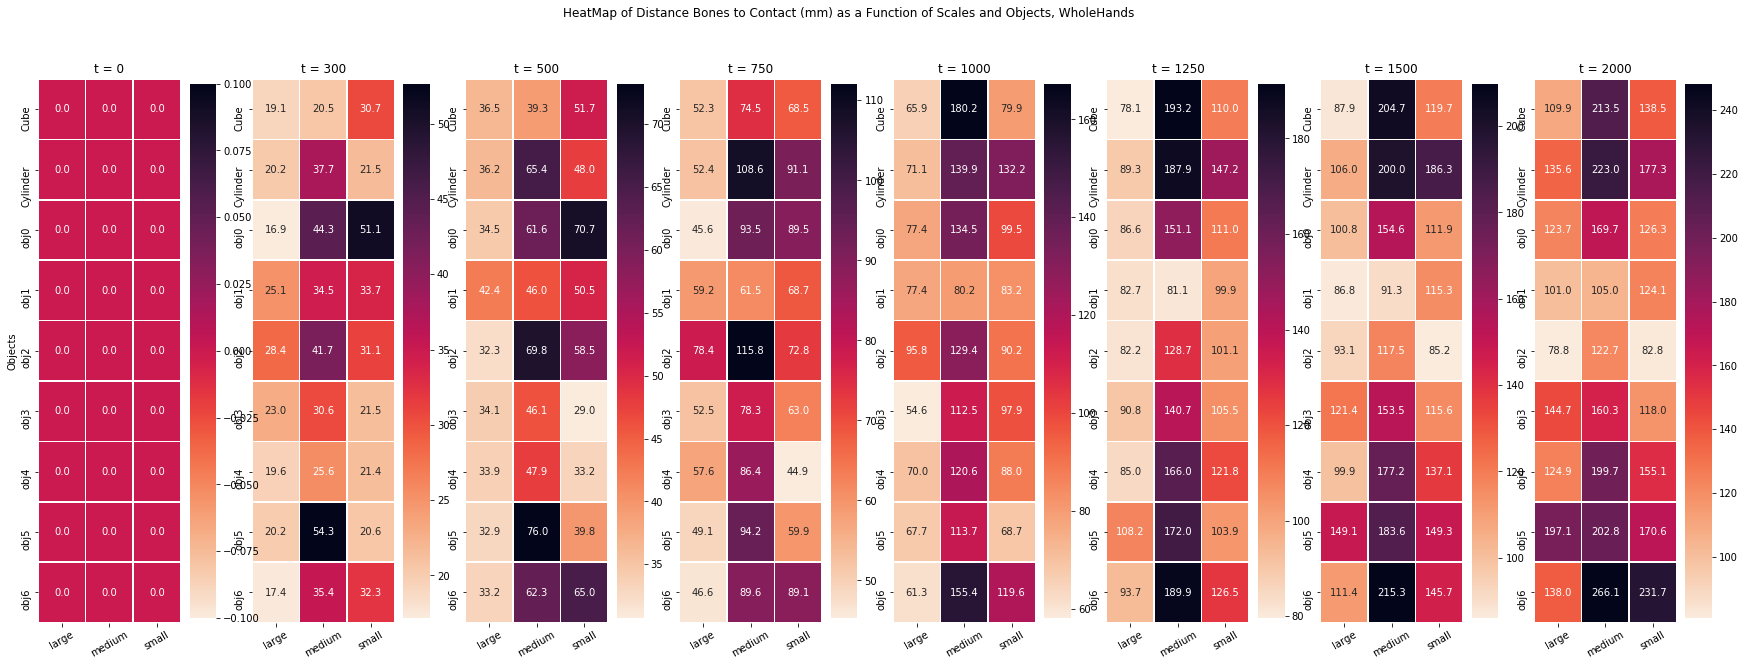

In [26]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers        
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Objects, WholeHands')

plt.show()

# Tasks and Objects

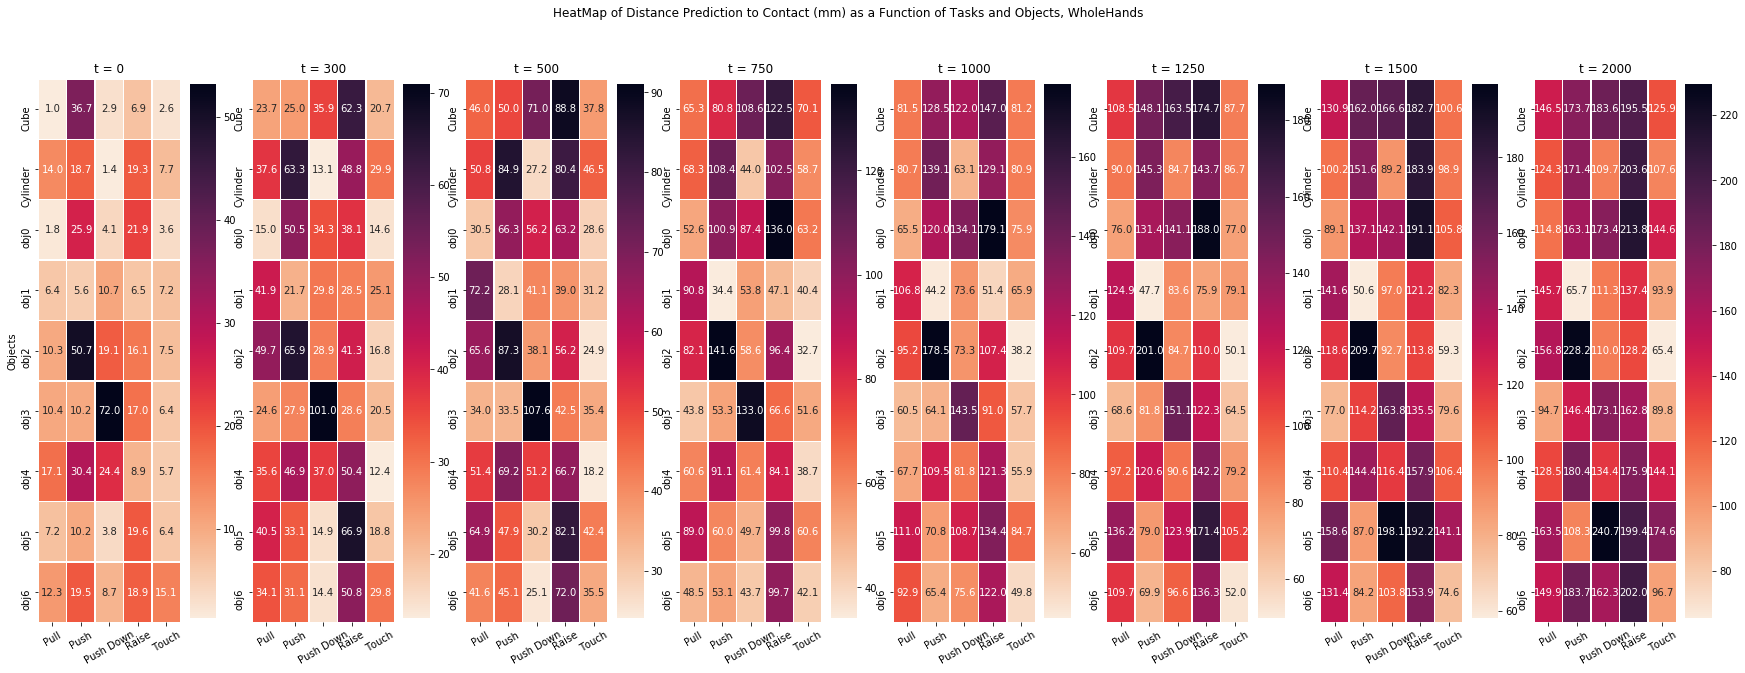

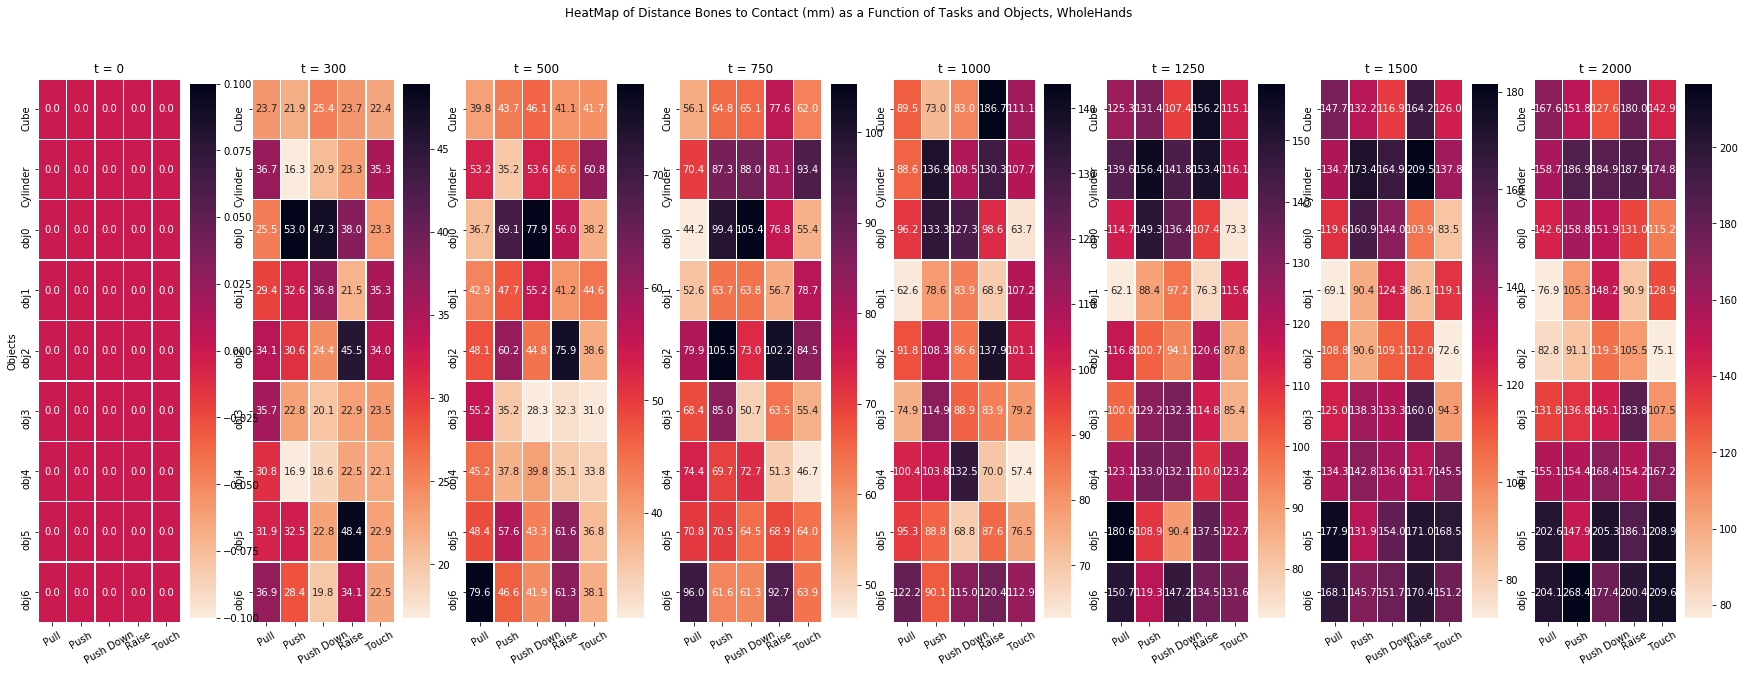

In [27]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Tasks and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Tasks and Objects, WholeHands')

plt.show()